<a href="https://colab.research.google.com/github/Ucchwas/Compare-two-Dataset/blob/main/Compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
mitbih_df=pd.read_csv('/content/drive/MyDrive/Datasets/mitbih_test.csv',header=None)
label_df=pd.read_csv('/content/drive/MyDrive/Datasets/Label_CNN_All.csv',header=None)

In [41]:
mitbih_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [42]:
col1 = mitbih_df[187]
col1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 21892, dtype: float64

In [43]:
col2 = label_df[1]
col2

0        0
1        0
2        0
3        0
4        0
        ..
21887    4
21888    4
21889    0
21890    4
21891    4
Name: 1, Length: 21892, dtype: int64

In [44]:
num_matches = sum (col1 == col2)
accuracy = num_matches / len(mitbih_df) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 93.91%


In [45]:
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
cm = confusion_matrix(mitbih_df[187], label_df[1])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[17711    53   216    72    66]
 [  141   390    22     2     1]
 [   95   187   995    23   148]
 [   70    19     5    67     1]
 [  126    68    18     0  1396]]


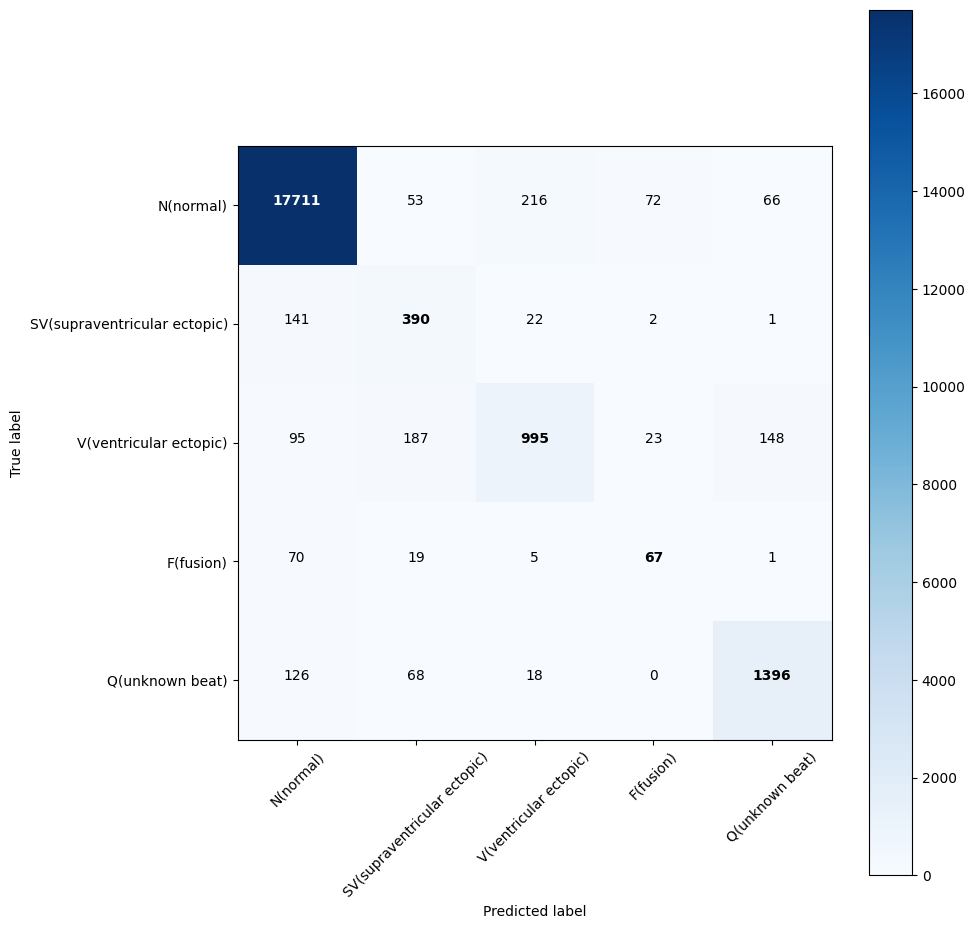

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == j:
                plt.text(j, i, format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontweight='bold')
            else:
                plt.text(j, i, format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute the confusion matrix
cm = confusion_matrix(mitbih_df[187], label_df[1])

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['N(normal)', 'SV(supraventricular ectopic)', 'V(ventricular ectopic)', 'F(fusion)', 'Q(unknown beat)'], normalize=False, cmap=plt.cm.Blues)

# Save the plot as a JPEG image with higher DPI (e.g., 300)
plt.savefig('confusion_matrix.jpg', dpi=300)

# Show the plot
plt.show()
